# 주식 포트폴리오 최적화


## 실습의 내용

주식 시장에서의 투자 결정을 프로그래밍을 통해 최적화하는 방법을 다뤄보며 금융 데이터를 이용한 프로그래밍에 익숙해지는 것을 목적으로 함. 참여자들은 주식 종목의 수익률, 리스크, 상관관계 등의 데이터를 활용하여 주식 포트폴리오를 구성하고, 투자자의 특정 목표나 제약 조건을 고려하여 최적의 포트폴리오를 찾는 방법을 배울 수 있음.

## Data Exploration

In [1]:
# 데이터 다운로드 받기 1 (직접)
# https://github.com/sunaroum/studynote/blob/main/dataset/Mock_Stock_Data.csv에 가서 다운로드 받기

# 데이터 다운로드 받기 2 (자동으로)
!curl -L -O https://raw.githubusercontent.com/sunaroum/studynote/main/dataset/Mock_Stock_Data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15.8M  100 15.8M    0     0  12.3M      0  0:00:01  0:00:01 --:--:-- 12.3M


In [2]:
import pandas as pd

df = pd.read_csv("/content/Mock_Stock_Data.csv")

df

,날짜,회사명,업종,상장일,지역,표준코드,단축코드,주가,상장 주식 수
0,20100116,Company_21,소비재,20100116,울산,S3920,C185,12204,11026
1,20100117,Company_21,소비재,20100116,울산,S3920,C185,12532,11026
2,20100118,Company_21,소비재,20100116,울산,S3920,C185,12716,11026
3,20100119,Company_21,소비재,20100116,울산,S3920,C185,13040,11026
4,20100120,Company_21,소비재,20100116,울산,S3920,C185,13101,11026
...,...,...,...,...,...,...,...,...,...
250113,20221231,Company_95,의료,20190517,울산,S7079,C682,89982,43319
250114,20221231,Company_96,소비재,20221220,부산,S4090,C876,39847,43792
250115,20221231,Company_97,금융,20170810,대구,S3533,C620,663,5592
250116,20221231,Company_98,소비재,20110615,부산,S7821,C464,15041,30259


## Data Preprocessing

In [3]:
# 주어진 자료를 직접 확인하기

# 데이터를 획득한 곳에 있는 Description을 읽어보거나 다운로드 받기
# https://github.com/sunaroum/studynote/blob/main/dataset/data%20description.pdf

In [4]:
# EDA

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250118 entries, 0 to 250117
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   날짜       250118 non-null  int64 
 1   회사명      250118 non-null  object
 2   업종       250118 non-null  object
 3   상장일      250118 non-null  int64 
 4   지역       250118 non-null  object
 5   표준코드     250118 non-null  object
 6   단축코드     250118 non-null  object
 7   주가       250118 non-null  int64 
 8   상장 주식 수  250118 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 17.2+ MB


### **주의사항**

해당 데이터는 형식적인 코딩 절차를 구현하기 위한 모의 데이터로,
실제 주식 데이터의 양상과는 큰 차이가 있습니다.

ex - 상장 주식 수가 고정되어 있음, 주가의 변동이 형식적임 등



## Data Processing

### 1. 데이터 수집 및 가공 단계

- 이 단계에서는 주식 종목들의 과거 데이터를 기반으로 수익률 데이터를 수집하고 가공하여 사용 가능한 형태로 변환합니다.
- 주요 Task :
	- 주식 종목의 과거 수익률 데이터를 수집하고 가공하기
	- 주식 종목 목록 및 해당 종목의 수익률 데이터를 얻기

In [5]:
import pandas as pd

# 데이터프레임 행 정렬
df.sort_values(by=['날짜', '회사명'], inplace=True)

# 주식 종목 목록 추출
stock_list = df['회사명'].unique()

# 주식 종목별 수익률 데이터 계산
returns_data = []
for stock in stock_list:
    stock_data = df[df['회사명'] == stock].copy()  # 복사본 생성
    stock_data['일별수익률'] = stock_data['주가'].pct_change()  # 일별 수익률 계산
    returns_data.append(stock_data)

# 주식 종목별 수익률 데이터프레임 생성
returns_df = pd.concat(returns_data)

In [6]:
# 결과 데이터프레임 출력
display(returns_df)

,날짜,회사명,업종,상장일,지역,표준코드,단축코드,주가,상장 주식 수,일별수익률
0,20100116,Company_21,소비재,20100116,울산,S3920,C185,12204,11026,NaN
1,20100117,Company_21,소비재,20100116,울산,S3920,C185,12532,11026,0.026876
2,20100118,Company_21,소비재,20100116,울산,S3920,C185,12716,11026,0.014682
3,20100119,Company_21,소비재,20100116,울산,S3920,C185,13040,11026,0.025480
4,20100120,Company_21,소비재,20100116,울산,S3920,C185,13101,11026,0.004678
...,...,...,...,...,...,...,...,...,...,...
249714,20221227,Company_96,소비재,20221220,부산,S4090,C876,35478,43792,-0.029277
249814,20221228,Company_96,소비재,20221220,부산,S4090,C876,36270,43792,0.022324
249914,20221229,Company_96,소비재,20221220,부산,S4090,C876,37343,43792,0.029584
250014,20221230,Company_96,소비재,20221220,부산,S4090,C876,38481,43792,0.030474


### 2. 리스크와 수익률 계산 단계

- 이 단계에서는 각 주식 종목의 리스크와 수익률을 계산하고, 포트폴리오의 전체 리스크와 예상 수익률을 평가합니다.
- 주요 Task :
	- 주식 종목의 수익률과 통계의 산술평균 개념을 이용해서 평균 수익률 계산하기
	- 주식 종목의 수익률과 통계의 표준편차 개념을 이용해서 리스크 계산하기

In [7]:
# 주식 종목별 평균 수익률 계산
average_returns = returns_df.groupby('회사명')['일별수익률'].mean()

# 주식 종목별 리스크(표준편차) 계산
risk_stddev = returns_df.groupby('회사명')['일별수익률'].std()

In [8]:
# 좀 더 보기 쉽게 만들어봅시다

# 수익률 순위 계산
returns_ranking = average_returns.sort_values(ascending=False)

# 결과 출력
print("주식 종목별 수익률 및 리스크 순위:")
for rank, stock in enumerate(returns_ranking.index, start=1):
    avg_return = average_returns[stock]
    risk = risk_stddev[stock]
    print(f"{rank}. 회사명: {stock}, 평균 수익률: {avg_return:.4f}, 리스크(표준편차): {risk:.4f}")

주식 종목별 수익률 및 리스크 순위:
1. 회사명: Company_96, 평균 수익률: 0.0193, 리스크(표준편차): 0.0302
2. 회사명: Company_18, 평균 수익률: 0.0027, 리스크(표준편차): 0.0292
3. 회사명: Company_13, 평균 수익률: 0.0019, 리스크(표준편차): 0.0293
4. 회사명: Company_80, 평균 수익률: 0.0017, 리스크(표준편차): 0.0294
5. 회사명: Company_53, 평균 수익률: 0.0016, 리스크(표준편차): 0.0292
6. 회사명: Company_16, 평균 수익률: 0.0015, 리스크(표준편차): 0.0293
7. 회사명: Company_58, 평균 수익률: 0.0012, 리스크(표준편차): 0.0290
8. 회사명: Company_37, 평균 수익률: 0.0011, 리스크(표준편차): 0.0288
9. 회사명: Company_95, 평균 수익률: 0.0011, 리스크(표준편차): 0.0295
10. 회사명: Company_19, 평균 수익률: 0.0010, 리스크(표준편차): 0.0290
11. 회사명: Company_52, 평균 수익률: 0.0009, 리스크(표준편차): 0.0287
12. 회사명: Company_1, 평균 수익률: 0.0009, 리스크(표준편차): 0.0291
13. 회사명: Company_32, 평균 수익률: 0.0009, 리스크(표준편차): 0.0287
14. 회사명: Company_44, 평균 수익률: 0.0008, 리스크(표준편차): 0.0283
15. 회사명: Company_42, 평균 수익률: 0.0007, 리스크(표준편차): 0.0289
16. 회사명: Company_85, 평균 수익률: 0.0007, 리스크(표준편차): 0.0283
17. 회사명: Company_4, 평균 수익률: 0.0005, 리스크(표준편차): 0.0289
18. 회사명: Company_36, 평균 수익률: 0.0005, 리스크(표준편차): 0.0288


### 3. 포트폴리오 최적화 모델링 단계

- 이 단계에서는 다양한 수학적 최적화 기법을 활용하여 주식 포트폴리오의 조합을 찾습니다.
- 주요 Task :
	- 주어진 종목들에 대해 포트폴리오 조합을 찾는 최적화 문제를 정의하기
	- 그 중에서도 특별히 Markowitz의 포트폴리오 이론을 활용하여 리스크-수익률 공간에서 효율적인 포트폴리오 조합을 찾기

**최적화 문제 정의하기**

1. <b> 최적화의 목적 </b> : 주어진 주식 종목으로 구성된 포트폴리오에서 기대 수익률을 극대화하거나 리스크를 최소화하는 포트폴리오 비중을 찾는 것

2. <b> 최적화에서 사용하는 변수 </b> : 각 주식 종목에 대한 비중 (0 ~ 1 사이의 값, 총 합이 1이어야 함)

In [9]:
import cvxpy as cp
import numpy as np

# 실제 분석 데이터를 사용할 때는 공분산으로 변경해서 사용하는 편이 간편함
average_returns = returns_df.groupby('회사명')['일별수익률'].mean()
cov_matrix = returns_df.pivot_table(index='날짜', columns='회사명', values='일별수익률', aggfunc='mean').cov()

# Markowitz 포트폴리오 최적화
num_assets = len(stock_list)
weights = cp.Variable(num_assets)
expected_returns = np.array(average_returns)
risk_free_rate = 0.03  # 무위험 이자율 (임의 설정)

# 목적 함수: 포트폴리오 수익률 - 리스크 조절항 (최대로 만드는 목표)
objective = cp.Maximize(expected_returns @ weights - risk_free_rate * cp.sum(weights))

In [10]:
print("★ 평균 수익률 ★")
print(average_returns)
print(" ")

print("★ 리스크 ★")
print(cov_matrix)
print(" ")

print("★ 종목 개수 ★")
print(num_assets)
print(" ")

print("★ 비중 ★")
print(weights)
print(" ")

print("★ 기대 수익률 ★")
print(expected_returns)
print(" ")

print("★ 무위험 이자율 ★")
print(risk_free_rate)
print(" ")

print("★ 목적 함수 ★")
print(objective)

★ 평균 수익률 ★
회사명
Company_0    -0.000450
Company_1     0.000879
Company_10   -0.000640
Company_11    0.000315
Company_12   -0.000545
                ...   
Company_95    0.001055
Company_96    0.019324
Company_97   -0.000264
Company_98    0.000142
Company_99    0.000468
Name: 일별수익률, Length: 100, dtype: float64
 
★ 리스크 ★
회사명         Company_0     Company_1    Company_10    Company_11  Company_12  \
회사명                                                                           
Company_0    0.000831 -2.058193e-05 -1.595524e-05  1.362187e-05    0.000032   
Company_1   -0.000021  8.476282e-04  2.403813e-06  3.117358e-07    0.000003   
Company_10  -0.000016  2.403813e-06  8.560350e-04 -1.819424e-05    0.000043   
Company_11   0.000014  3.117358e-07 -1.819424e-05  8.468725e-04   -0.000026   
Company_12   0.000032  2.583202e-06  4.291235e-05 -2.616372e-05    0.000824   
...               ...           ...           ...           ...         ...   
Company_95  -0.000033 -2.519464e-05 -1.389795e-05

### 4. 제약 조건 고려 단계

- 이 단계에서는 투자자의 선호도나 제약 조건 (예: 최소 수익률 달성, 최대 리스크 허용 등)을 포트폴리오 최적화 모델에 반영합니다.
- 주요 Task :
	- 투자자의 제약 조건을 최적화 모델에 추가하기
	- 최소 수익률 달성, 최대 리스크 허용 등의 제약 조건을 정의하기

In [11]:
# 제약 조건: 비중의 합은 1, 각 비중은 0 이상 1 이하여야 함
constraints = [cp.sum(weights) == 1, weights >= 0, weights <= 1]

In [12]:
print("★ 제약 조건 ★")
print(constraints)

★ 제약 조건 ★
[Equality(Expression(AFFINE, UNKNOWN, ()), Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, ZERO, ())), Inequality(Variable((100,)))]


### 5. 최적화 알고리즘 실행 단계

- 이 단계에서는 우리가 해결해야 할 문제를 최적화해서 답을 도출할 수 있는 알고리즘을 찾고 적용합니다.
- 주요 Task :
   - Quadratic Programming과 같은 알고리즘을 실행하기
   - 최적화 알고리즘을 사용하여 최적 포트폴리오 조합을 찾기

In [13]:
# Quadratic Programming (포트폴리오 리스크 계산)
portfolio_risk = cp.sqrt(cp.quad_form(weights, cov_matrix))

portfolio_risk

Expression(UNKNOWN, NONNEGATIVE, (1, 1))

In [14]:
# 최적화 문제 정의
problem = cp.Problem(objective, constraints)

# 최적화 문제 해결
problem.solve()

# 최적 비중 출력
optimal_weights = weights.value

# 결과 출력
print("최적 포트폴리오 비중:")
for i, stock in enumerate(stock_list):
    if(optimal_weights[i] < 0.0001) :
      continue
    print(f"{stock}: {optimal_weights[i]:.4f}")

최적 포트폴리오 비중:
Company_18: 1.0000


### 6. 시뮬레이션과 결과 분석 단계

- 이 단계에서는 프로그램을 통해 다양한 시나리오의 포트폴리오를 시뮬레이션하고 결과를 분석하여 어떤 조합이 가장 효율적인지를 평가합니다.
- 주요 Task :
   - 최적 포트폴리오를 바탕으로 다양한 시나리오를 시뮬레이션하기
   - 각 시나리오에서의 포트폴리오 수익률 및 리스크를 계산하고 결과를 분석하기

In [15]:
# 최적 비중 출력
optimal_weights = weights.value

# 시뮬레이션 및 결과 분석
num_simulations = 10000
simulated_results = []
for _ in range(num_simulations):
    random_weights = np.random.rand(num_assets)
    random_weights /= np.sum(random_weights)
    simulated_return = np.sum(random_weights * expected_returns)
    simulated_risk = np.sqrt(np.dot(random_weights.T, np.dot(cov_matrix.values, random_weights)))
    simulated_results.append((simulated_return, simulated_risk))

simulated_results = np.array(simulated_results)

In [16]:
simulated_results

array([[ 1.17279460e-04,  3.38598657e-03],
       [ 3.26633265e-04,  3.70452542e-03],
       [ 8.51198368e-05,  3.31739160e-03],
       ...,
       [-2.13210554e-05,  3.46218764e-03],
       [ 2.16328975e-04,  3.31154223e-03],
       [ 7.09782867e-05,  3.39772556e-03]])

In [17]:
optimal_expected_return = expected_returns @ optimal_weights
optimal_portfolio_risk = cp.sqrt(cp.quad_form(optimal_weights, cov_matrix))

print("\n최적 포트폴리오의 예상 수익률:", optimal_expected_return)
print("최적 포트폴리오의 리스크 (표준편차):", optimal_portfolio_risk.value)


최적 포트폴리오의 예상 수익률: 0.01932443064515388
최적 포트폴리오의 리스크 (표준편차): 0.030249695639154642


### 7. 시각화 단계

- 이 단계에서는 최적화된 포트폴리오 및 다양한 리스크-수익률 조합에 대한 시각화를 통해 결정을 내릴 수 있도록 도움을 줍니다.
- 주요 Task :
   - 최적 포트폴리오 및 다양한 시나리오의 수익률-리스크 조합을 시각화하여 표시하기
   - Matplotlib, Plotly 등의 시각화 라이브러리를 활용하기

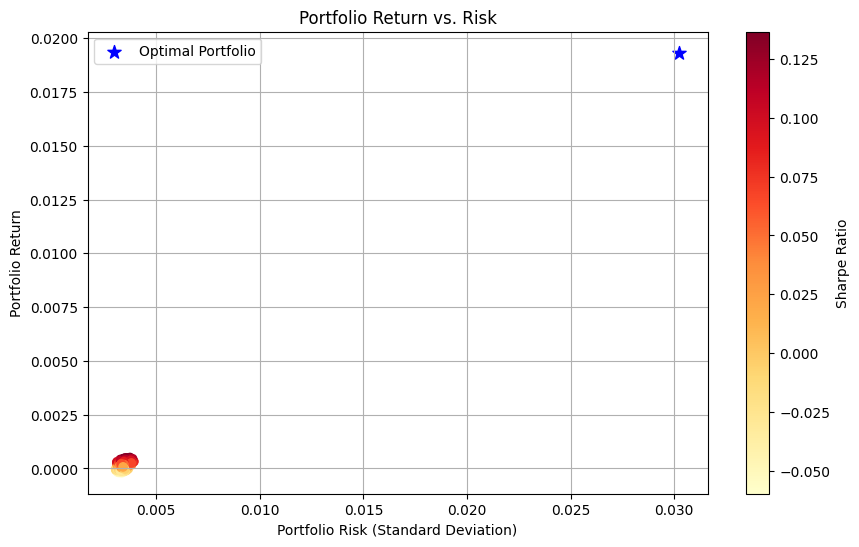

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(simulated_results[:, 1], simulated_results[:, 0], c=simulated_results[:, 0] / simulated_results[:, 1], cmap='YlOrRd', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.title('Portfolio Return vs. Risk')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.scatter(optimal_portfolio_risk.value, optimal_expected_return, color='blue', marker='*', s=100, label='Optimal Portfolio')
plt.legend()
plt.grid(True)
plt.show()
